# Assessing genes for CRISPR screening

Using data from the DepMap portal, we can create some data visualizations to better represent potential genes of interest.

## Part 0: Data Preparation

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's import our csv data for depmap, as well as the list for gene classifications:

In [3]:
depmap = pd.read_csv('datasets/depmap.csv', delimiter=',')

In [4]:
# swap the rows and columns for easier data access
depmap = depmap.transpose()

In [5]:
# set the column names to be the first row
depmap.columns = depmap.iloc[0]

In [6]:
# remove the first row
depmap.drop(depmap.index[[0]], inplace=True)

In [7]:
# remove numbers attached to the gene symbols
def format_index(table):
    gene_list = []
    for ind, row in table.iterrows():
        new_index = ind.split()
        gene_list.append(new_index[0])
    
    table.reset_index(inplace=True)
    table.insert(0, 'hgnc_symbol', gene_list)
    table.drop(labels=['index'], axis=1, inplace=True)

format_index(depmap)

In [8]:
# rename the first column
depmap.rename(index={'Unnamed: 0': 'index'}, inplace=True)

In [9]:
depmap

Unnamed: 0,hgnc_symbol,ACH-000164,ACH-000235,ACH-000243,ACH-000281,ACH-000320,ACH-000468,ACH-000601
0,A1BG,-0.0246236,0.178479,0.190157,0.128103,0.0801178,-0.183469,0.00744975
1,A1CF,0.0607031,0.123219,0.00916395,0.250814,0.209807,-0.111095,0.141809
2,A2M,-0.0951474,-0.0642431,0.023984,0.0349791,-0.26308,-0.0098931,-0.0293038
3,A2ML1,0.175003,0.157026,0.156006,0.133597,0.133151,0.0978103,0.244144
4,A3GALT2,-0.0969467,-0.0118657,-0.0730303,-0.0825586,-0.19652,0.0629397,-0.125533
...,...,...,...,...,...,...,...,...
16378,TOR3A,-0.0164497,-0.224793,-0.130085,0.0472863,-0.0769314,-0.0672694,-0.109366
16379,TOR4A,-0.0499945,0.0321407,-0.0322262,0.068559,-0.19677,-0.232897,-0.0791958
16380,TOX,-0.0587911,-0.0663157,-0.00981127,-0.0307534,0.0789109,0.130398,0.0223616
16381,TOX2,0.147551,0.184688,0.167271,0.190666,0.341036,0.278518,0.119335


In [10]:
def make_gene_group_dict(path):
    # importing the groups that these genes belong to
    group_df = pd.read_csv(path, delimiter=',')
    
    group_names = list(group_df.columns.values)
    
    group_numpy = group_df.to_numpy(copy=True)
    
    gene_group_dict = {}
    
    curr_group_name = ''
    for index, value in np.ndenumerate(group_numpy):
        curr_group_name = group_names[index[1]]
        gene_group_dict[value] = curr_group_name
    
    return gene_group_dict

gene_group_dict = make_gene_group_dict('datasets/partitioned-genes-list.csv')

In [11]:
def add_gene_groups(table):
    working_table = table.copy()
    # importing the groups that each of these genes belongs to
    working_table['Group'] = working_table['hgnc_symbol'].map(gene_group_dict).fillna('None')
    
    return working_table

# depmap groups has additional column with the group that each gene belongs to
depmap_groups = add_gene_groups(depmap)

In [12]:
depmap_groups.head(50)

Unnamed: 0,hgnc_symbol,ACH-000164,ACH-000235,ACH-000243,ACH-000281,ACH-000320,ACH-000468,ACH-000601,Group
0,A1BG,-0.0246236,0.178479,0.190157,0.128103,0.0801178,-0.183469,0.00744975,None
1,A1CF,0.0607031,0.123219,0.00916395,0.250814,0.209807,-0.111095,0.141809,None
2,A2M,-0.0951474,-0.0642431,0.023984,0.0349791,-0.26308,-0.0098931,-0.0293038,None
3,A2ML1,0.175003,0.157026,0.156006,0.133597,0.133151,0.0978103,0.244144,None
4,A3GALT2,-0.0969467,-0.0118657,-0.0730303,-0.0825586,-0.19652,0.0629397,-0.125533,None
5,A4GALT,-0.0876712,0.0407892,-0.0451451,-0.0930093,-0.15052,-0.0862902,-0.0620479,None
6,A4GNT,0.0642217,0.0639188,0.0365167,0.12266,0.0154277,0.21412,0.064983,None
7,AAAS,-0.775688,-0.441872,-0.53289,-0.887666,-0.508985,-0.623352,-0.464539,None
8,AACS,0.0557207,0.043678,0.224567,0.0390283,0.258967,0.0363742,0.1056,None
9,AADAC,0.131578,0.0850314,0.0861575,0.115144,0.0201036,0.10302,0.106303,None


## Part 1: Scatter Plots for DepMap expression data

In [13]:
import seaborn as sns

In [14]:
def sort_by_increasing(table, cell_line):
    sorted_table = table.sort_values(cell_line)
    
    x_axis = []
    counter = 0
    for x in range(len(sorted_table)):
        x_axis.append(counter)
        counter = counter + 1
    
    sorted_table['Gene'] = x_axis
    
    return sorted_table
    
sort_by_increasing(depmap_groups, 'ACH-000164')

Unnamed: 0,hgnc_symbol,ACH-000164,ACH-000235,ACH-000243,ACH-000281,ACH-000320,ACH-000468,ACH-000601,Group,Gene
12794,RAN,-2.30252,-2.36623,-2.3023,-1.90767,-2.09781,-2.59858,-2.34687,None,0
13358,RPL17,-2.28861,-2.15938,-1.86612,-2.0612,-2.0898,-2.33037,-1.88253,None,1
12429,PSMA3,-2.23314,-2.1853,-1.96275,-2.07905,-2.0318,-1.89192,-1.99971,None,2
12464,PSMD7,-2.1955,-2.04619,-1.9702,-1.79509,-1.90434,-2.20346,-2.0243,None,3
15548,TBC1D3B,-2.18106,-2.10185,-1.90306,-2.07235,-2.35726,-2.42174,-1.97877,None,4
...,...,...,...,...,...,...,...,...,...,...
16231,TMLHE,NaN,0.0969857,0.140688,0.233193,0.189776,0.0684786,0.111617,None,16378
16254,TMSB15A,NaN,-0.0721049,-0.131966,-0.11858,-0.183191,-0.138653,-0.191057,None,16379
16255,TMSB15B,NaN,0.0720694,0.00340798,0.134854,0.114786,0.0914164,0.0121797,None,16380
16256,TMSB4X,NaN,0.207806,0.439421,0.163819,0.231741,0.0553684,0.138186,None,16381


In [15]:
def draw_scatter_plot(table, cell_line, title, opacity):
    
    sorted_table = sort_by_increasing(table, cell_line)
    
    if opacity:
        sns.lmplot(x='Gene', y=cell_line, data=sorted_table, fit_reg=False, hue='Group', palette='bright', 
                   height=4, scatter_kws={'alpha':0.15, 's':60})
    else:
        sns.lmplot(x='Gene', y=cell_line, data=sorted_table, fit_reg=False, hue='Group', palette='bright',
                  scatter_kws={'s':10})
    
    for line in range(0,sorted_table.shape[0]):
        if sorted_table[cell_line][line] > 0.8:
            plt.text(sorted_table['Gene'][line]+0.01, sorted_table[cell_line][line]+0.01, 
            sorted_table['hgnc_symbol'][line], horizontalalignment='left', 
            fontsize=7, color='black')
    
    plt.title(title, fontsize=25, y=1.15)
    
    plt.ylabel('Expression Value')
    
    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    # resizing the graph
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

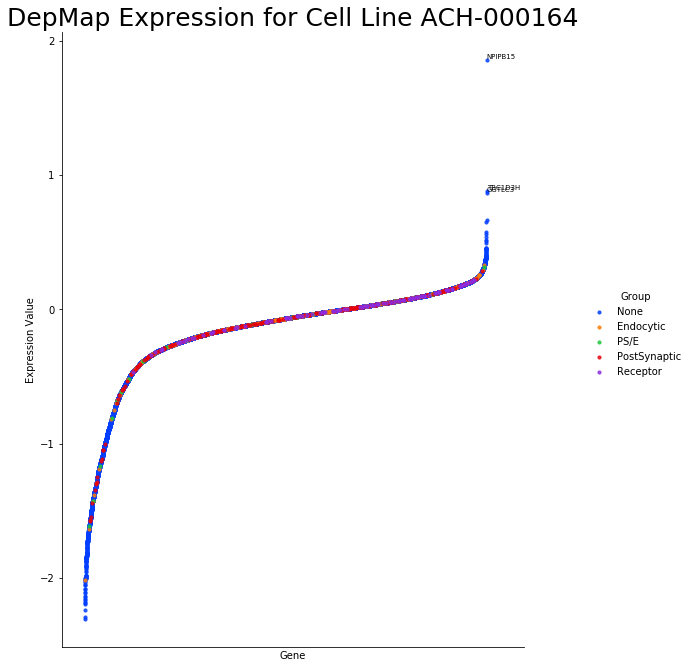

In [16]:
draw_scatter_plot(depmap_groups, 'ACH-000164', 'DepMap Expression for Cell Line ACH-000164', False)

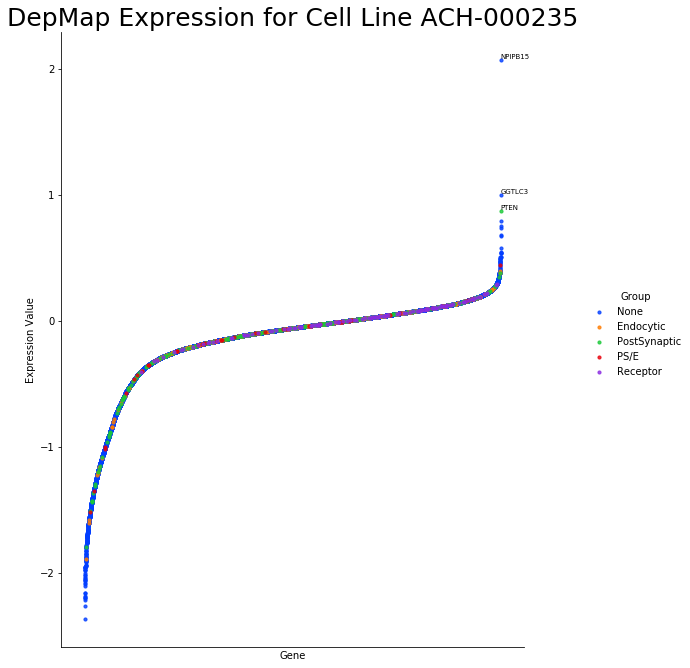

In [17]:
draw_scatter_plot(depmap_groups, 'ACH-000235', 'DepMap Expression for Cell Line ACH-000235', False)

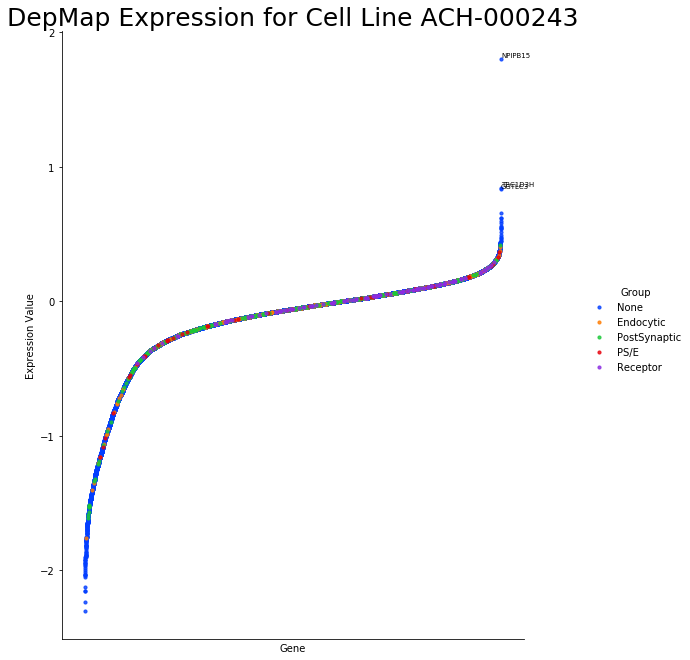

In [18]:
draw_scatter_plot(depmap_groups, 'ACH-000243', 'DepMap Expression for Cell Line ACH-000243', False)

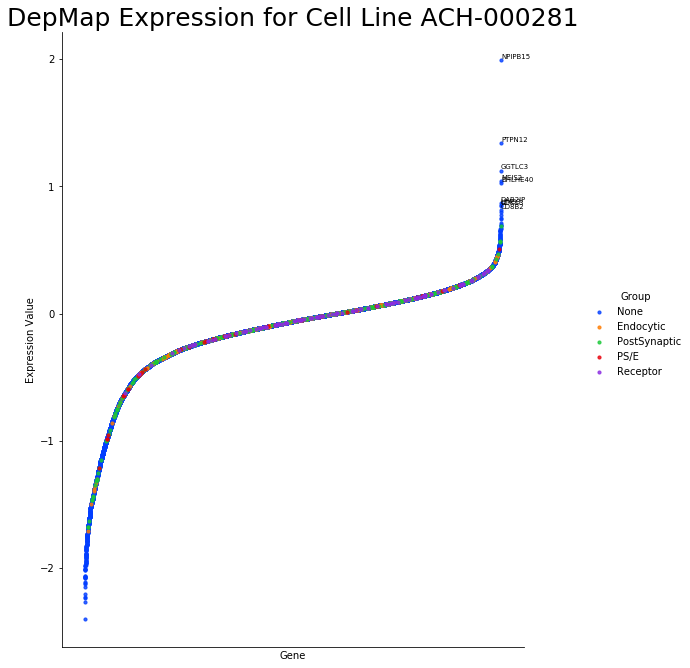

In [19]:
draw_scatter_plot(depmap_groups, 'ACH-000281', 'DepMap Expression for Cell Line ACH-000281', False)

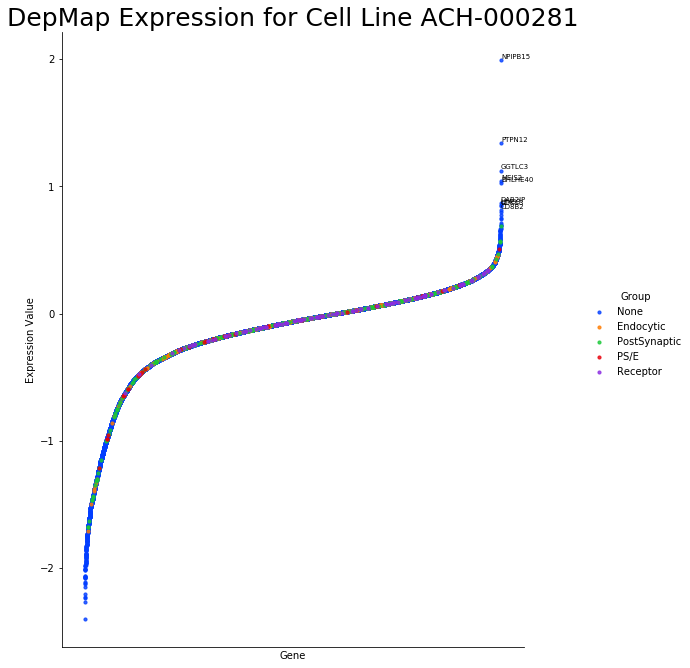

In [20]:
draw_scatter_plot(depmap_groups, 'ACH-000281', 'DepMap Expression for Cell Line ACH-000281', False)

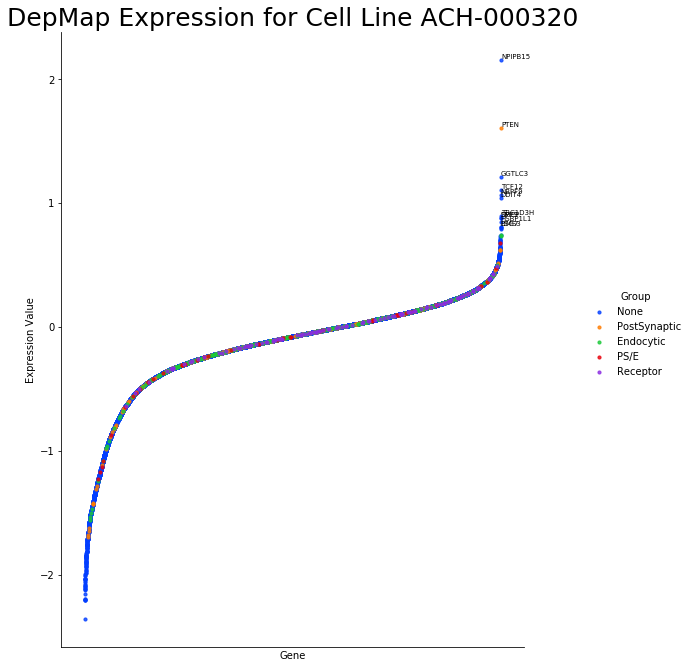

In [21]:
draw_scatter_plot(depmap_groups, 'ACH-000320', 'DepMap Expression for Cell Line ACH-000320', False)

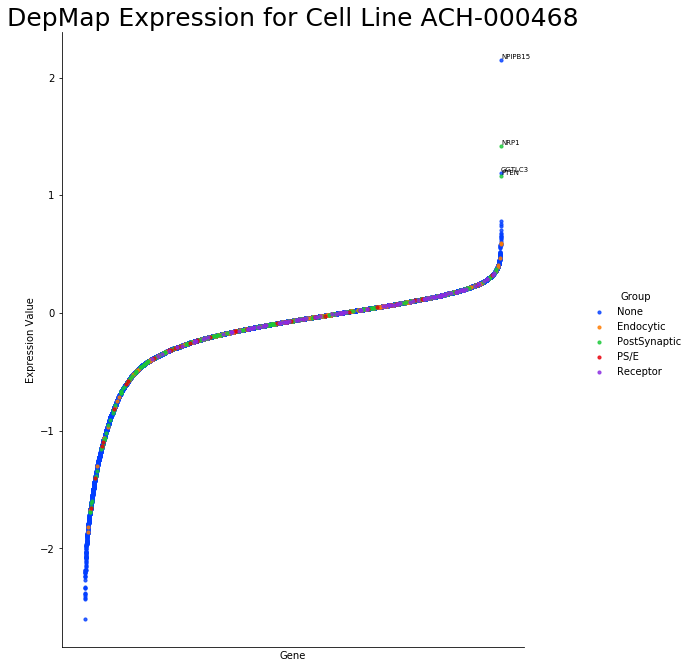

In [22]:
draw_scatter_plot(depmap_groups, 'ACH-000468', 'DepMap Expression for Cell Line ACH-000468', False)

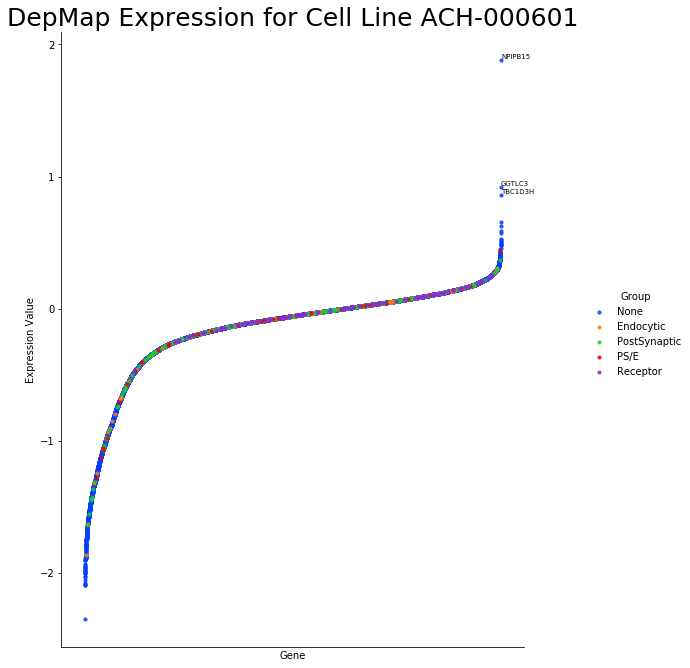

In [23]:
draw_scatter_plot(depmap_groups, 'ACH-000601', 'DepMap Expression for Cell Line ACH-000601', False)

If we try changing the opacity of the graph, we get something like this:

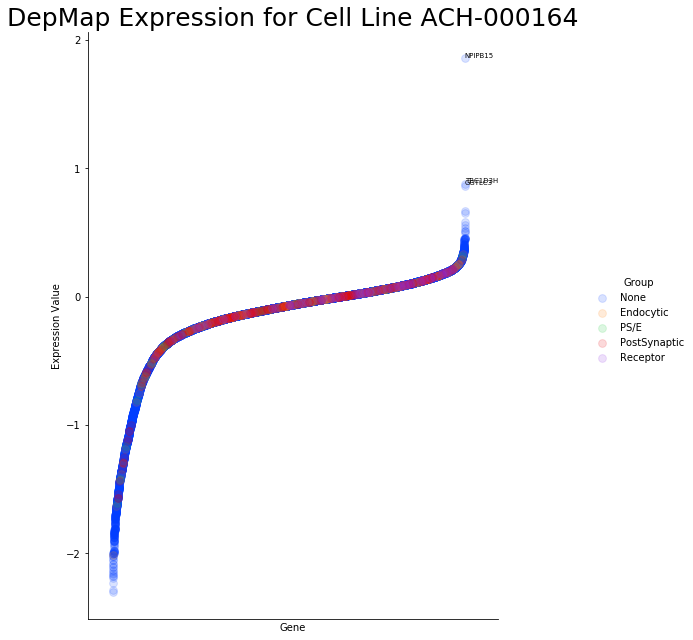

In [24]:
draw_scatter_plot(depmap_groups, 'ACH-000164', 'DepMap Expression for Cell Line ACH-000164', True)

average every post synaptic gene and t test comparison to all of the other genes added together

### Part 1.b Taking the average of the cell lines

the function average_cell_lines should take in the original depmap first and then add the necessary groups to the table for plotting.

In [25]:
def average_cell_lines(table):
    depmap = table.copy()
    
    hgnc_column = depmap['hgnc_symbol']
    depmap.drop(labels=['hgnc_symbol'], axis=1, inplace=True)
    
    depmap['Average'] = depmap.mean(axis=1)
    
    depmap.insert(0, 'hgnc_symbol', hgnc_column)
    
    return depmap

In [26]:
depmap_average = average_cell_lines(depmap)

In [27]:
depmap_average_groups = add_gene_groups(depmap_average)

depmap_average_groups

Unnamed: 0,hgnc_symbol,ACH-000164,ACH-000235,ACH-000243,ACH-000281,ACH-000320,ACH-000468,ACH-000601,Average,Group
0,A1BG,-0.0246236,0.178479,0.190157,0.128103,0.0801178,-0.183469,0.00744975,0.053745,None
1,A1CF,0.0607031,0.123219,0.00916395,0.250814,0.209807,-0.111095,0.141809,0.097774,None
2,A2M,-0.0951474,-0.0642431,0.023984,0.0349791,-0.26308,-0.0098931,-0.0293038,-0.057529,None
3,A2ML1,0.175003,0.157026,0.156006,0.133597,0.133151,0.0978103,0.244144,0.156677,None
4,A3GALT2,-0.0969467,-0.0118657,-0.0730303,-0.0825586,-0.19652,0.0629397,-0.125533,-0.074788,None
...,...,...,...,...,...,...,...,...,...,...
16378,TOR3A,-0.0164497,-0.224793,-0.130085,0.0472863,-0.0769314,-0.0672694,-0.109366,-0.082516,None
16379,TOR4A,-0.0499945,0.0321407,-0.0322262,0.068559,-0.19677,-0.232897,-0.0791958,-0.070055,None
16380,TOX,-0.0587911,-0.0663157,-0.00981127,-0.0307534,0.0789109,0.130398,0.0223616,0.009428,None
16381,TOX2,0.147551,0.184688,0.167271,0.190666,0.341036,0.278518,0.119335,0.204152,None


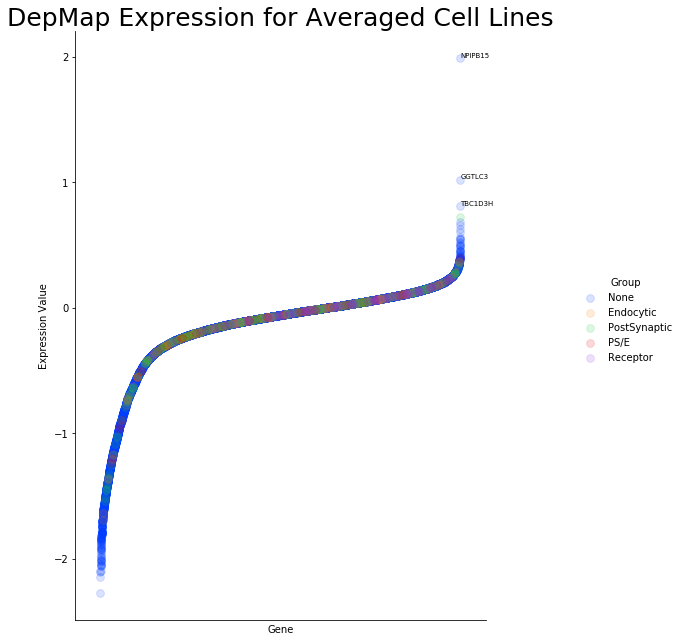

In [28]:
draw_scatter_plot(depmap_average_groups, 'Average', 'DepMap Expression for Averaged Cell Lines', True)